<a href="https://colab.research.google.com/github/prudhvi193/Community-Detection-using-BigCLAM-V-2.0/blob/main/Community_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###***Project-5 (Community Detection using BigCLAM)***
###***Name : Prudhviraj Sheela***

###***OSU CWID : A20228857***

In [ ]:
# Importing all the necessary packages
import networkx as nx 
import numpy as np
import pandas as pd
import math

***Loading of the Youtube Edge List Data***

In [ ]:
# In below step we read the edge list data and obtain the graph
G = nx.read_edgelist("/content/YouTube.edgelist", nodetype=int)

In [ ]:
# In the below step we try to obtain the number of nodes and edges for the given graph
nodes_V = len(G.nodes())
edges_E = len(G.edges())
print(nodes_V,edges_E)

7675 35622


***Loading the Ground Truth Communities Data File***

In [ ]:
groundtruth_communities_file = "/content/groundtruth_communities.txt" 
groundtruth_communities_list = [] # This list stores all the details of each node and its associated community as list of sublists
with open(groundtruth_communities_file) as fg: # Opening the ground truth communities file
  for line in fg: # Parses through each community from the file
    groundtruth_communities_list.append([int(a) for a in line.split()]) # Appends each communities nodes as a list which forms up the entire groundtruth communities list

In [ ]:
# In the below step we find the total number of communities present from the ground truth communities file loaded
K_Comm = len(groundtruth_communities_list)
K_Comm

29

# ***STEP-I: Factor Matrix Initialization***

***Method-1: Factor Matrix Initialization for 20 Percent Seed Communities***

***I) Loading the 20 Percent Seed Communities Data File***

***II) Computing the Factorization Matrix associated to 20 Percent Seed Communities and associated conductance calculation***

In [ ]:
percent20_seeds_communities_file = "/content/20percent_seed_communities.txt"
percent20_seeds_communities_list = [] # This list stores all the details of each node and its associated community as list of sublists
with open(percent20_seeds_communities_file) as fp: # Opening the 20 percent seed communities file
  for line in fp: # Parses through each community from the file
    percent20_seeds_communities_list.append([int(a) for a in line.split()]) # Appends each communities nodes as a list which forms up the entire 20 percent seed communities list

In [ ]:
# In this below step we are initially creating a factor matriz initialization based on the nodes in the community
fact_matrix_seed20 = np.zeros((nodes_V,K_Comm)) # Initializing the factor matrix with all zeros and the size is |V|*K
for a in range(len(percent20_seeds_communities_list)): # Iterating through each community list of 20 percent seeds
  for b in percent20_seeds_communities_list[a]: # Iterating through each node of that particular community
    fact_matrix_seed20[b][a] = 1 # Update the value in the factor matrix with '1' for the corresponding node and community combination
fact_matrix_seed20 # Displays the initial factor matrix for 20 percent seeds data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
# In this below step we compute the conductance for the remaining values in the "fact_matrix_20"
for a in range(len(fact_matrix_seed20)): # Iterating through the range of initial factor matrix obtained for 20 percent seed communities
  value_minimum = np.inf # Initialized minimum value
  for b in range(len(fact_matrix_seed20[0])): # Iterating through each node within the factor matrix
    conduct = nx.conductance(G, (percent20_seeds_communities_list[b]+list(G.neighbors(a))+[a])) # Computing the conductance associated with the particular node and their associated neighbors data
    if value_minimum > conduct: # If obtained conductance value is less then the minimum value then we reassign them
      value_minimum = conduct # Now we swap the values obtained
      conduct_minimum = b # This stores the node number having the minimum conductance
    for c in list(G.neighbors(a))+[a]: # In this loop we evaluate if 'u' is locally minimal to 'c' and update it with '1' else keep at as '0'
      fact_matrix_seed20[c][conduct_minimum] = 1
fact_matrix_seed20 # Displays the final factor matrix for 20 percent seed communities obtained on computing the conductance

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

***Method-2: Factor Matrix Initialization for Neighborhood Seed Communities***

***I) Loading the Neighborhood Seed Communities Data File***

***II) Computing the Factorization Matrix associated to Neighborhood Seed Communities and associated conductance calculation***

In [ ]:
neighbor_seeds_communities_file = "/content/neighborhood_seeds.txt" 
neighbor_seeds_communities_list = [] # This list stores all the details of each node and its associated community as list of sublists
with open(neighbor_seeds_communities_file) as fn: # Opening the neighborhood seed communities file
  for line in fn: # Parses through each community from the file
    neighbor_seeds_communities_list.append([int(a) for a in line.split()]) # Appends each communities nodes as a list which forms up the entire neighborhood seed communities list

In [ ]:
# In this below step we are initially creating a factor matriz initialization based on the nodes in the community
fact_matrix_neighborseeds = np.zeros((nodes_V,K_Comm)) # Initializing the factor matrix with all zeros and the size is |V|*K
for a in range(len(neighbor_seeds_communities_list)): # Iterating through each community list of neighborhood seeds
  for b in neighbor_seeds_communities_list[a]:  # Iterating through each node of that particular community
    fact_matrix_neighborseeds[b][a] = 1 # Update the value in the factor matrix with '1' for the corresponding node and community combination
fact_matrix_neighborseeds # Displays the initial factor matrix for neighborhood seeds data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# In this below step we compute the conductance for the remaining values in the "fact_matrix_neighborseeds"
for a in range(len(fact_matrix_neighborseeds)): # Iterating through the range of initial factor matrix obtained for neighborhood communities
  value_minimum = np.inf # Initialized minimum value
  for b in range(len(fact_matrix_neighborseeds[0])): # Iterating through each node within the factor matrix
    conduct = nx.conductance(G, (neighbor_seeds_communities_list[b]+list(G.neighbors(a))+[a])) # Computing the conductance associated with the particular node and their associated neighbors data
    if value_minimum > conduct: # If obtained conductance value is less then the minimum value then we reassign them
      value_minimum = conduct # Now we swap the values obtained
      conduct_minimum = b # This stores the community number having the minimum conductance of all communities
    for c in list(G.neighbors(a))+[a]: # In this loop we evaluate if 'u' is locally minimal to 'c' and update it with '1' else keep at as '0'
      fact_matrix_neighborseeds[c][conduct_minimum] = 1
fact_matrix_neighborseeds # Displays the final factor matrix for neighborhood seed communities obtained on computing the conductance

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

***Method-3: Simple Factor Matrix Initialization with random numbers between [0,1]***

In [ ]:
fact_simple = np.random.rand(nodes_V,K_Comm) # Creating a simple factor matrix with random values in range between [0,1]
fact_simple = np.around(fact_simple,decimals=4) # Rounding each value in the entry to a decimal place of '4'
fact_simple # Displays the final simple factor matrix obtained

array([[0.5925, 0.2615, 0.3671, ..., 0.569 , 0.2287, 0.1857],
       [0.8111, 0.109 , 0.3692, ..., 0.626 , 0.1454, 0.6072],
       [0.652 , 0.9353, 0.3155, ..., 0.0355, 0.5076, 0.8748],
       ...,
       [0.0908, 0.0406, 0.9257, ..., 0.0124, 0.7007, 0.2908],
       [0.7766, 0.5184, 0.4598, ..., 0.7746, 0.9794, 0.2125],
       [0.9243, 0.4225, 0.3763, ..., 0.4491, 0.807 , 0.0279]])

# ***STEP-II: Matrix Factorization Optimization using BigCLAM v2.0***

***Method-1: Matrix Factorization for 20 Percent Seed Communities Data File***


In [ ]:
percentage_change=0
for iter in range(300): # Given number of iterations
  summation_all_nodes = fact_matrix_seed20.sum(axis=0) # Computes F(w) value this is used to add up the sum of all nodes communities with respect to the axis 
  for a in range(len(fact_matrix_seed20)): # Iterating through each nodes in the factor matrix for computing gradient
    neighbors_data = list(G.neighbors(a)) # Collecting the list of neighboring nodes of the nodes choosen
    summation_nodes_v = [0]*K_Comm # Creating initial summation of nodes for the number of communities
    Delta_1 = [0]*K_Comm # Initializing an array with zeros for all the communities
    for b in neighbors_data: # Iterating through each neigbor data
      if (1-np.exp(-np.matmul(fact_matrix_seed20[a],fact_matrix_seed20[b].transpose()))): # It checks if the calculated value of gradient of factor matrix is "nan" or not and then calculates the gradient function
        Delta_12 = np.exp(-np.matmul(fact_matrix_seed20[a],fact_matrix_seed20[b].transpose()))/(1-np.exp(-np.matmul(fact_matrix_seed20[a],fact_matrix_seed20[b].transpose()))) # Computing the delta gradient function
      else: # If the obtained value of gradient would raise an infinite value (or) division by zero error we replace it with "0"
        Delta_12 = 0 # Replacing with '0' if any kind of math errors occur 'or' nan values occur
      Delta_1 = (fact_matrix_seed20[b]*Delta_12) + Delta_1 # This calculates the first term of the gradient function
      summation_nodes_v = fact_matrix_seed20[b] + summation_nodes_v # This finds the summation of F(v) which is the second term in the formula
    Delta_2 = summation_all_nodes - fact_matrix_seed20[a] - summation_nodes_v # Final F(v) obtained for non-belonging neighbor nodes which is the 2nd term in the formula
    Delta_Main = Delta_1 - Delta_2 # The final gradient is computed by subtracting both the above Delta_1 and Delta_2 terms found out
    change = 0.1*sum(Delta_Main)/sum(fact_matrix_seed20[a])
    if change < 0.001: # This condition checks if the F-Value
      percentage_change+=1
    fact_matrix_seed20[a] = fact_matrix_seed20[a] + (0.001*Delta_Main) # Updates the corresponding row value
    Non_Neg_Vector = fact_matrix_seed20[a] < 0 # Projects F[u] back to a non-negative vector and if the value of F[u][c]<0 then change the value F[u][c] = 0
    fact_matrix_seed20[a][Non_Neg_Vector] = 0 # Updating the F[u][c]=0
  if percentage_change == nodes_V:
    break

In [ ]:
fact_matrix_seed20 # Displays the updated 20 percent seed community factorial matrix after performing matrix factorization using BigCLAM

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

***Method-2: Matrix Factorization for Neighborhood Seed Communities Data File***

In [ ]:
percentage_change = 0
for iter in range(300): # Given number of iterations
  summation_all_nodes = fact_matrix_neighborseeds.sum(axis=0) # Computes F(w) value this is used to add up the sum of all nodes communities with respect to the axis 
  for a in range(len(fact_matrix_neighborseeds)): # Iterating through each nodes in the factor matrix for computing gradient
    neighbors_data = list(G.neighbors(a)) # Collecting the list of neighboring nodes of the nodes choosen
    summation_nodes_v = [0]*K_Comm # Creating initial summation of nodes for the number of communities
    Delta_1 = [0]*K_Comm # Initializing an array with zeros for all the communities
    for b in neighbors_data: # Iterating through each neigbor data
      if (1-np.exp(-np.matmul(fact_matrix_neighborseeds[a],fact_matrix_neighborseeds[b].transpose()))): # It checks if the calculated value of gradient of factor matrix is "nan" or not and then calculates the gradient function
        Delta_12 = np.exp(-np.matmul(fact_matrix_neighborseeds[a],fact_matrix_neighborseeds[b].transpose()))/(1-np.exp(-np.matmul(fact_matrix_neighborseeds[a],fact_matrix_neighborseeds[b].transpose()))) # Computing the delta gradient function
      else: # If the obtained value of gradient would raise an infinite value (or) division by zero error we replace it with "0"
        Delta_12 = 0 # Replacing with '0' if any kind of math errors occur 'or' nan values occur
      Delta_1 = (fact_matrix_neighborseeds[b]*Delta_12) + Delta_1 # This calculates the first term of the gradient function
      summation_nodes_v = fact_matrix_neighborseeds[b] + summation_nodes_v # This finds the summation of F(v) which is the second term in the formula
    Delta_2 = summation_all_nodes - fact_matrix_neighborseeds[a] - summation_nodes_v # Final F(v) obtained for non-belonging neighbor nodes which is the 2nd term in the formula
    Delta_Main = Delta_1 - Delta_2 # The final gradient is computed by subtracting both the above Delta_1 and Delta_2 terms found out
    change = 0.1*sum(Delta_Main)/sum(fact_matrix_neighborseeds[a])
    if change < 0.001:
      percentage_change+=1
    fact_matrix_neighborseeds[a] = fact_matrix_neighborseeds[a] + (0.001*Delta_Main) # Updates the corresponding row value
    Non_Neg_Vector = fact_matrix_neighborseeds[a] < 0 # Projects F[u] back to a non-negative vector and if the value of F[u][c]<0 then change the value F[u][c] = 0
    fact_matrix_neighborseeds[a][Non_Neg_Vector] = 0 # Updating the F[u][c]=0
  if percentage_change == nodes_V:
    break

In [ ]:
fact_matrix_neighborseeds # Displays the updated neighborhood community factorial matrix after performing matrix factorization using BigCLAM

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

***Method-3: Matrix Factorization for Simple Factor Matrix generated randomly***

In [ ]:
percentage_change = 0
for iter in range(300): # Given number of iterations
  summation_all_nodes = fact_simple.sum(axis=0) # Computes F(w) value this is used to add up the sum of all nodes communities with respect to the axis 
  for a in range(len(fact_simple)): # Iterating through each nodes in the factor matrix for computing gradient
    neighbors_data = list(G.neighbors(a)) # Collecting the list of neighboring nodes of the nodes choosen
    summation_nodes_v = [0]*K_Comm # Creating initial summation of nodes for the number of communities
    Delta_1 = [0]*K_Comm # Initializing an array with zeros for all the communities
    for b in neighbors_data: # Iterating through each neigbor data
      if (1-np.exp(-np.matmul(fact_simple[a],fact_simple[b].transpose()))): # It checks if the calculated value of gradient of factor matrix is "nan" or not and then calculates the gradient function
        Delta_12 = np.exp(-np.matmul(fact_simple[a],fact_simple[b].transpose()))/(1-np.exp(-np.matmul(fact_simple[a],fact_simple[b].transpose()))) # Computing the delta gradient function
      else: # If the obtained value of gradient would raise an infinite value (or) division by zero error we replace it with "0"
        Delta_12 = 0 # Replacing with '0' if any kind of math errors occur 'or' nan values occur
      Delta_1 = (fact_simple[b]*Delta_12) + Delta_1 # This calculates the first term of the gradient function
      summation_nodes_v = fact_simple[b] + summation_nodes_v # This finds the summation of F(v) which is the second term in the formula
    Delta_2 = summation_all_nodes - fact_simple[a] - summation_nodes_v # Final F(v) obtained for non-belonging neighbor nodes which is the 2nd term in the formula
    Delta_Main = Delta_1 - Delta_2 # The final gradient is computed by subtracting both the above Delta_1 and Delta_2 terms found out
    change = 0.1*sum(Delta_Main)/sum(fact_simple[a])
    if change < 0.0001:
      percentage_change+=1
    fact_simple[a] = fact_simple[a] + (0.0001*Delta_Main) # Updates the corresponding row value
    Non_Neg_Vector = fact_simple[a] < 0 # Projects F[u] back to a non-negative vector and if the value of F[u][c]<0 then change the value F[u][c] = 0
    fact_simple[a][Non_Neg_Vector] = 0 # Updating the F[u][c]=0
  if percentage_change == nodes_V:
    break

In [ ]:
fact_simple # Displays the updated simple random factorial matrix after performing matrix factorization using BigCLAM

array([[0.21251361, 0.        , 0.        , ..., 0.18701883, 0.        ,
        0.        ],
       [0.42819644, 0.        , 0.        , ..., 0.2411751 , 0.        ,
        0.22371122],
       [0.274555  , 0.55947943, 0.        , ..., 0.        , 0.13276151,
        0.49620777],
       ...,
       [0.        , 0.        , 0.53890104, ..., 0.        , 0.32027732,
        0.        ],
       [0.39375631, 0.13711589, 0.07317122, ..., 0.38973485, 0.59921964,
        0.        ],
       [0.54135288, 0.04067971, 0.        , ..., 0.0640881 , 0.42663516,
        0.        ]])

# ***Step-III: Community Assignment***



***Initialzing the value of δ = sqrt(1-log(1- 𝜀)) where 𝜀 = 10^(-8)***

In [ ]:
delta = math.sqrt(-math.log(1-math.pow(10,-8))) # Given value of delta
delta

0.00010000000050123797

***Method-1: Community Assignment for 20 Percent Seed Communities Data***

In [ ]:
factmat20_comm_membership = dict() # Initialize a dictionary to store which nodes correspond to which community once assigned
for a in range(len(fact_matrix_seed20)): # Iterates through each node
  for b in range(len(fact_matrix_seed20[0])): # Iterates through each community
    if b not in factmat20_comm_membership.keys(): # Checks if the community is present in the dictionary created and if it is not present it creates an empty list
      factmat20_comm_membership[b] = [] # Initializing empty list
    if fact_matrix_seed20[a][b] >= delta: # Checking if the F[u][c] >= delta and updating the community value in dictionary by appending the nodes
      factmat20_comm_membership[b].append(a)
print(factmat20_comm_membership) # Displays the obtained communities dictionary for 20 Percent Seed Communities

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [7, 40, 47, 53, 54, 56, 59, 60, 61, 69, 97, 108, 120, 121, 127, 129, 131, 145, 161, 168, 186, 189, 205, 209, 214, 225, 229, 264, 266, 267, 270, 278, 285, 291, 295, 321, 326, 327, 336, 341, 352, 362, 363, 364, 365, 417, 439, 443, 445, 451, 462, 465, 466, 468, 483, 489, 512, 518, 521, 532, 534, 540, 541, 559, 564, 571, 574, 576, 579, 584, 585, 588, 611, 614, 616, 617, 622, 624, 638, 641, 648, 653, 673, 679, 689, 695, 723, 729, 742, 748, 764, 784, 798, 807, 817, 819, 821, 827, 828, 839, 852, 856, 858, 862, 873, 876, 883, 884, 886, 891, 893, 899, 900, 901, 909, 914, 926, 932, 937, 945, 947, 972, 977, 981, 982, 1001, 1007, 1008, 1011, 1012, 1014, 1021, 1028, 1030, 1038, 1049, 1052, 1061, 1062, 1071, 1074, 1078, 1080, 1101, 1113, 1121, 1123, 1125, 1144, 1158, 1173, 1179, 1186, 1189, 1194, 1211, 1217, 1219, 1228, 1248, 1249, 1266, 1277, 1279, 1285, 1287, 1291, 1293, 1294, 1321, 1325, 1326, 1332, 1333, 1345, 1347, 1351, 1353, 1358, 1380, 1387, 1401

***Output-1: Writing the detected communities for 20 Percent Seed Communities data into an output file***

In [ ]:
file_det1 = open('/content/20percent_seed_detected.txt','w') # The predicted communities data is written as output to this file
file_det1.write(str("Community")+str("--->")+str("Nodes")) # This is the header format in the file written
file_det1.write("\n")
for key,value in factmat20_comm_membership.items(): # We iterate through the dictionary and write its content to the file line by line
  file_det1.write(str(key)+str("--->")+str(value))
  file_det1.write("\n")
file_det1.close() # Close the file once values are written to file

***Method-2: Community Assignment for Neighoborhood Communities Data***

In [ ]:
factmatneighbor_comm_membership = dict() # Initialize a dictionary to store which nodes correspond to which community once assigned
for a in range(len(fact_matrix_neighborseeds)): # Iterates through each node
  for b in range(len(fact_matrix_neighborseeds[0])): # Iterates through each community
    if b not in factmatneighbor_comm_membership.keys(): # Checks if the community is present in the dictionary created and if it is not present it creates an empty list
      factmatneighbor_comm_membership[b] = [] # Initializing empty list
    if fact_matrix_neighborseeds[a][b] >= delta: # Checking if the F[u][c] >= delta and updating the community value in dictionary by appending the nodes
      factmatneighbor_comm_membership[b].append(a)
print(factmatneighbor_comm_membership)  # Displays the obtained communities dictionary for Neighborhood Seed Communities

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [0, 25, 141, 233, 284, 373, 434, 577, 580, 633, 682, 812, 837, 1041, 1059, 1092, 1221, 1241, 1267, 1308, 1320, 1376, 1379, 1463, 1479, 1597, 1633, 1663, 1694, 1749, 1754, 1782, 1841, 1848, 1873, 1908, 2175, 2250, 2285, 2310, 2381, 2388, 2416, 2420, 2430, 2471, 2494, 2496, 2502, 2511, 2574, 2582, 2625, 2633, 2641, 2670, 2876, 2890, 3100, 3130, 3182, 3188, 3197, 3236, 3350, 3470, 3618, 3673, 3688, 3727, 3862, 3863, 3964, 4002, 4070, 4153, 4167, 4220, 4269, 4290, 4297, 4432, 4468, 4511, 4564, 4633, 4699, 4825, 4828, 4849, 4860, 4867, 4918, 5151, 5171, 5230, 5377, 5457, 5482, 5505, 5545, 5666, 5702, 5732, 5791, 5878, 5979, 5984, 6034, 6194, 6458, 6498, 6795, 6862, 7012, 7123, 7186, 7204, 7238, 7272, 7394, 7417, 7443, 7456, 7461, 7505, 7529, 7537, 7540, 7546, 7595, 7623, 7636, 7646], 8: [], 9: [], 10: [], 11: [1, 10, 14, 22, 25, 34, 40, 57, 65, 75, 88, 99, 119, 144, 148, 150, 160, 161, 165, 176, 177, 178, 179, 188, 192, 202, 203, 221, 231

***Output-2: Writing the detected communities for neighborhood communities data into an output file***

In [ ]:
file_det2 = open('/content/neigborhood_seed_detected.txt','w') # The predicted communities data is written as output to this file
file_det2.write(str("Community")+str("--->")+str("Nodes")) # This is the header format in the file written
file_det2.write("\n")
for key,value in factmatneighbor_comm_membership.items(): # We iterate through the dictionary and write its content to the file line by line
  file_det2.write(str(key)+str("--->")+str(value))
  file_det2.write("\n")
file_det2.close() # Close the file once values are written to file

***Method-3: Community Assignment for simple random generated data***

In [ ]:
factmatsimple_comm_membership = dict() # Initialize a dictionary to store which nodes correspond to which community once assigned
for a in range(len(fact_simple)): # Iterates through each node
  for b in range(len(fact_simple[0])): # Iterates through each community
    if b not in factmatsimple_comm_membership.keys(): # Checks if the community is present in the dictionary created and if it is not present it creates an empty list
      factmatsimple_comm_membership[b] = [] # Initializing empty list
    if fact_simple[a][b] >= delta: # Checking if the F[u][c] >= delta and updating the community value in dictionary by appending the nodes
      factmatsimple_comm_membership[b].append(a)
print(factmatsimple_comm_membership) # Displays the obtained communities dictionary for Neighborhood Seed Communities

{0: [0, 1, 2, 3, 5, 6, 7, 8, 10, 12, 13, 14, 17, 19, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 47, 48, 52, 54, 55, 56, 57, 60, 61, 62, 69, 70, 71, 73, 74, 75, 77, 78, 79, 81, 84, 86, 87, 88, 92, 95, 96, 97, 98, 99, 100, 102, 103, 105, 106, 107, 109, 112, 114, 116, 117, 121, 123, 126, 127, 128, 129, 131, 132, 134, 136, 137, 138, 140, 141, 143, 144, 147, 148, 149, 150, 152, 154, 158, 162, 164, 165, 166, 167, 168, 169, 171, 172, 173, 175, 176, 178, 183, 185, 190, 192, 193, 194, 195, 196, 198, 199, 203, 204, 206, 207, 208, 209, 212, 213, 216, 217, 218, 219, 222, 223, 226, 227, 228, 231, 234, 235, 236, 238, 240, 243, 246, 247, 248, 251, 253, 255, 256, 259, 261, 262, 265, 266, 267, 268, 270, 272, 274, 275, 276, 277, 278, 280, 282, 283, 284, 285, 286, 287, 292, 293, 294, 295, 296, 297, 298, 301, 302, 303, 304, 306, 307, 308, 309, 311, 312, 313, 314, 316, 317, 318, 319, 320, 321, 322, 323, 324, 326, 327, 328, 329, 331, 332, 334, 336, 339, 343, 344, 345, 347, 3

***Output-3: Writing the detected communities for simple random generated data into an output file***

In [ ]:
file_det3 = open('/content/simple_generated_detected.txt','w') # The predicted communities data is written as output to this file
file_det3.write(str("Community")+str("--->")+str("Nodes")) # This is the header format in the file written
file_det3.write("\n")
for key,value in factmatsimple_comm_membership.items(): # We iterate through the dictionary and write its content to the file line by line
  file_det3.write(str(key)+str("--->")+str(value))
  file_det3.write("\n")
file_det3.close() # Close the file once values are written to file

# ***Step-IV: Evaluation using Recall***



In [ ]:
# In this cell we obtain the dictionary of elements from the ground truth communities file
groundtruth_communities = dict() # Initialize a dictionary to store which nodes correspond to which community once assigned
i=0 # Counter used to increment the community number
with open(groundtruth_communities_file) as gf: # We open the file and reading its data
  for line in gf: # Iterates through each line
    gr_list1 = [int(a) for a in line.split()] # Stroing all the nodes in a list
    groundtruth_communities[i] = gr_list1 # Assigning the list of nodes to community
    i+=1 # Incrementing the community number
print(groundtruth_communities) # Diplays the dictionary of ground truth communities data of each community as key and its value as list of nodes

{0: [1949, 1950, 1951, 3, 1955, 1958, 5, 1961, 1962, 5779, 8, 1963, 5780, 5783, 1964, 11, 3869, 5786, 5787, 5788, 5789, 5791, 5792, 5793, 3872, 1970, 5794, 1971, 3877, 5798, 3878, 3881, 5800, 1975, 5802, 3885, 17, 1977, 3887, 3888, 3891, 5807, 1981, 1983, 5809, 1986, 1988, 1989, 28, 1993, 3893, 3898, 34, 5824, 41, 5827, 2006, 44, 5828, 2011, 48, 3915, 5831, 2012, 52, 5835, 5838, 5839, 3917, 3919, 2016, 3921, 2018, 5840, 3923, 2022, 5842, 5843, 3924, 5844, 5845, 3927, 5847, 3928, 5848, 2029, 5851, 64, 2034, 67, 3933, 3934, 2035, 70, 3936, 2037, 3938, 3939, 2039, 5855, 3942, 3945, 5864, 5865, 77, 5866, 79, 3952, 85, 86, 5874, 2055, 2056, 5876, 3963, 5878, 5880, 91, 5882, 2060, 3964, 5884, 2066, 95, 5894, 2068, 3970, 99, 100, 101, 2070, 3972, 106, 110, 2075, 5902, 5903, 3980, 115, 116, 2080, 3982, 2081, 2082, 117, 3983, 2084, 2088, 3985, 2089, 3986, 5910, 2091, 123, 5911, 3992, 3993, 2098, 126, 3999, 5921, 5922, 5926, 4002, 133, 136, 138, 140, 5936, 5939, 4009, 4010, 5941, 5943, 144, 2105

***Method-1: Evaluating the Recall Score for 20 Percent Seed Communities Data***


In [ ]:
matching = {} # This stores the predicted communities that match with the ground truth communities
collected = [] # Collects the community which are matched
for a in groundtruth_communities: # Iterating through the ground truth (original) communities
  for b in factmat20_comm_membership: # Iterating through predicted communitiies
    if a not in matching.keys(): # Checks if the key exists in the matching dictionary else assigns it a default community as '-1' and recall score as '0'
      matching[a] = (-1,0)
    if matching[a][1] < len(set(factmat20_comm_membership[a])&set(groundtruth_communities[b]))/len(set(groundtruth_communities[b])): # Checks if the matching score for that community is less than that of the predicted community choosen
      if b not in collected: # If predicted community is not present in the list then we append it by updating the matching score of the community associated
        matching[a] = (b,len(set(factmat20_comm_membership[a])&set(groundtruth_communities[b]))/len(set(groundtruth_communities[b]))) # Updated recall score for the community associated
  collected.append(matching[a][0]) # Appends the node associated to the collection list

recall_20per_seed = 0 # Initial score assigned for the predicted community
for a in matching: # If the community matches then we evaluate the recall score
  recall_20per_seed = recall_20per_seed + matching[a][1] # Updated recall score by adding the matching elements
recall_20per_seed = recall_20per_seed/K_Comm # Final recall score obtained by dividing with the number of communities
recall_20per_seed # Displays the recall score for 20 percent seed communities data

0.3837504280423056

***Method-2: Evaluating the Recall Score for Neighborhood Seed Communities Data***


In [ ]:
matching = {} # This stores the predicted communities that match with the ground truth communities
collected = [] # Collects the community which are matched
for a in groundtruth_communities: # Iterating through the ground truth (original) communities
  for b in factmatneighbor_comm_membership: # Iterating through predicted communitiies
    if a not in matching.keys(): # Checks if the key exists in the matching dictionary else assigns it a default community as '-1' and recall score as '0'
      matching[a] = (-1,0)
    if matching[a][1] < len(set(factmatneighbor_comm_membership[a])&set(groundtruth_communities[b]))/len(set(groundtruth_communities[b])): # Checks if the matching score for that community is less than that of the predicted community choosen
      if b not in collected: # If predicted community is not present in the list then we append it by updating the matching score of the community associated
        matching[a] = (b,len(set(factmatneighbor_comm_membership[a])&set(groundtruth_communities[b]))/len(set(groundtruth_communities[b])))  # Updated recall score for the community associated
  collected.append(matching[a][0]) # Appends the node associated to the collection list

recall_neighborhood_seed = 0 # Initial score assigned for the predicted community
for a in matching: # If the community matches then we evaluate the recall score
  recall_neighborhood_seed = recall_neighborhood_seed + matching[a][1] # Updated recall score by adding the matching elements
recall_neighborhood_seed = recall_neighborhood_seed/K_Comm # Final recall score obtained by dividing with the number of communities
recall_neighborhood_seed # Displays the recall score for neighborhood seed communities data

0.3016344391167117

***Method-3: Evaluating the Recall Score for simple random generated Data***


In [ ]:
matching = {} # This stores the predicted communities that match with the ground truth communities
collected = [] # Collects the community which are matched
for a in groundtruth_communities: # Iterating through the ground truth (original) communities
  for b in factmatsimple_comm_membership: # Iterating through predicted communitiies
    if a not in matching.keys(): # Checks if the key exists in the matching dictionary else assigns it a default community as '-1' and recall score as '0'
      matching[a] = (-1,0) 
    if matching[a][1] < len(set(factmatsimple_comm_membership[a])&set(groundtruth_communities[b]))/len(set(groundtruth_communities[b])): # Checks if the matching score for that community is less than that of the predicted community choosen
      if b not in collected: # If predicted community is not present in the list then we append it by updating the matching score of the community associated
        matching[a] = (b,len(set(factmatsimple_comm_membership[a])&set(groundtruth_communities[b]))/len(set(groundtruth_communities[b]))) # Updated recall score for the community associated
  collected.append(matching[a][0]) # Appends the node associated to the collection list

recall_simple_seed = 0 # Initial score assigned for the predicted community
for a in matching: # If the community matches then we evaluate the recall score
  recall_simple_seed = recall_simple_seed + matching[a][1] # Updated recall score by adding the matching elements
recall_simple_seed = recall_simple_seed/K_Comm # Final recall score obtained by dividing with the number of communities
recall_simple_seed # Displays the recall score for simple random initialized data

0.691295068677316

## ***Graph-1:***

***Horizontal Bar Plot between types of factorizations and their recall scores***

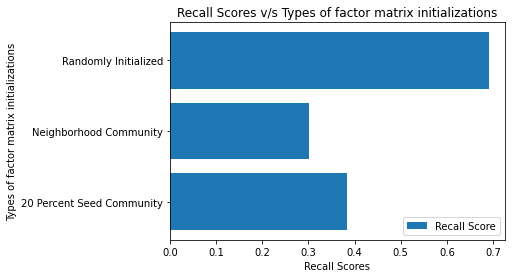

In [ ]:
import matplotlib.pyplot as plt # Package required for creating plots
# The below line creates a horizontal plot
plt.barh(["20 Percent Seed Community","Neighborhood Community","Randomly Initialized"],[recall_20per_seed,recall_neighborhood_seed,recall_simple_seed], align='center', label="Recall Score")
plt.legend() # Attaches a legend to the plot
plt.ylabel('Types of factor matrix initializations') # Sets the y-label
plt.xlabel('Recall Scores') # Sets the x-label
plt.title('Recall Scores v/s Types of factor matrix initializations') # Sets the title of the plot
plt.show() # Displays the plot

## ***Creating Additonal Graphs***

## ***Graph-2:***

For constructing the below graph I have evaluated the Miss Rate or False Negative Rate associated for the different types of factor matrix initializations and I have plotted the required graph.

Miss Rate = 1 - Hit Rate
(Here, Hit Rate = Recall Score)

***Method-1: Evaluating the Miss Rates for 20 Percent Seed Communities Data***

In [ ]:
missrate_20per_seed = 1-recall_20per_seed
missrate_20per_seed

0.6162495719576944

***Method-2: Evaluating the Miss Rates for Neighborhood Seed Communities Data***

In [ ]:
missrate_neighborhood_seed = 1 - recall_neighborhood_seed
missrate_neighborhood_seed

0.6983655608832884

***Method-3: Evaluating the Miss Rates for simple random generated Data***

In [ ]:
missrate_simple_seed = 1 - recall_simple_seed
missrate_simple_seed

0.30870493132268395

***Horizontal Bar Plot between types of factorizations and their miss rates***

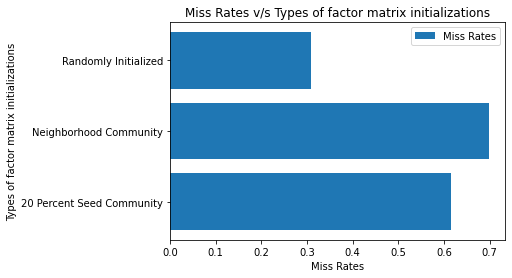

In [ ]:
# The below line creates a horizontal plot
plt.barh(["20 Percent Seed Community","Neighborhood Community","Randomly Initialized"],[missrate_20per_seed,missrate_neighborhood_seed,missrate_simple_seed], align='center', label="Miss Rates")
plt.legend() # Attaches a legend to the plot
plt.ylabel('Types of factor matrix initializations') # Sets the y-label
plt.xlabel('Miss Rates') # Sets the x-label
plt.title('Miss Rates v/s Types of factor matrix initializations') # Sets the title of the plot
plt.show() # Displays the plot

## ***Graph-3:***

For constructing the below graph I have evaluated the Precision Score associated for the different types of factor matrix initializations and I have plotted the required graph.

***Method-1: Evaluating the Precision Score for 20 Percent Seed Communities Data***

In [ ]:
matching = {} # This stores the predicted communities that match with the ground truth communities
collected = [] # Collects the community which are matched
for a in groundtruth_communities: # Iterating through the ground truth (original) communities
  for b in factmat20_comm_membership: # Iterating through predicted communitiies
    if a not in matching.keys(): # Checks if the key exists in the matching dictionary else assigns it a default community as '-1' and recall score as '0'
      matching[a] = (-1,0)
    if len(set(factmat20_comm_membership[a])) == 0: # If the length of predicted community is '0' we simply skip the community to avoid division by zero error
      continue
    else:
      if b not in collected: # If predicted community is not present in the list then we append it by updating the matching score of the community associated
        matching[a] = (b,len(set(factmat20_comm_membership[a])&set(groundtruth_communities[b]))/len(set(factmat20_comm_membership[a]))) # Updated precision score for the community associated
  collected.append(matching[a][0]) # Appends the node associated to the collection list

precision_20per_seed = 0 # Initial score assigned for the predicted community
for a in matching:  # If the community matches then we evaluate the precision score
  precision_20per_seed = precision_20per_seed + matching[a][1] # Updated precision score by adding the matching elements
precision_20per_seed = precision_20per_seed/K_Comm # Final precision score obtained by dividing with the number of communities
precision_20per_seed # Displays the precision score for 20 percent seed communities data

0.018097362034069555

***Method-2: Evaluating the Precision Score for Neighborhood Seed Communities Data***

In [ ]:
matching = {} # This stores the predicted communities that match with the ground truth communities
collected = [] # Collects the community which are matched
for a in groundtruth_communities: # Iterating through the ground truth (original) communities
  for b in factmatneighbor_comm_membership: # Iterating through predicted communitiies
    if a not in matching.keys(): # Checks if the key exists in the matching dictionary else assigns it a default community as '-1' and recall score as '0'
      matching[a] = (-1,0)
    if len(set(factmatneighbor_comm_membership[a])) == 0: # If the length of predicted community is '0' we simply skip the community to avoid division by zero error
      continue
    else:
      if b not in collected: # If predicted community is not present in the list then we append it by updating the matching score of the community associated
        matching[a] = (b,len(set(factmatneighbor_comm_membership[a])&set(groundtruth_communities[b]))/len(set(factmatneighbor_comm_membership[a]))) # Updated precision score for the community associated
  collected.append(matching[a][0]) # Appends the node associated to the collection list

precision_neighborhood_seed = 0 # Initial score assigned for the predicted community
for a in matching: # If the community matches then we evaluate the precision score
  precision_neighborhood_seed = precision_neighborhood_seed + matching[a][1] # Updated precision score by adding the matching elements
precision_neighborhood_seed = precision_neighborhood_seed/K_Comm # Final precision score obtained by dividing with the number of communities
precision_neighborhood_seed # Displays the precision score for neighborhood seed communities data

0.005876760867686457

***Method-3: Evaluating the Precision Score for simple random generated Data***

In [ ]:
matching = {} # This stores the predicted communities that match with the ground truth communities
collected = [] # Collects the community which are matched
for a in groundtruth_communities: # Iterating through the ground truth (original) communities
  for b in factmatsimple_comm_membership: # Iterating through predicted communitiies
    if a not in matching.keys(): # Checks if the key exists in the matching dictionary else assigns it a default community as '-1' and recall score as '0'
      matching[a] = (-1,0)
    if len(set(factmatsimple_comm_membership[a])) == 0: # If the length of predicted community is '0' we simply skip the community to avoid division by zero error
      continue
    else:
      if b not in collected: # If predicted community is not present in the list then we append it by updating the matching score of the community associated
        matching[a] = (b,len(set(factmatsimple_comm_membership[a])&set(groundtruth_communities[b]))/len(set(factmatsimple_comm_membership[a]))) # Updated precision score for the community associated
  collected.append(matching[a][0]) # Appends the node associated to the collection list

precision_simple_seed = 0 # Initial score assigned for the predicted community
for a in matching: # If the community matches then we evaluate the precision score
  precision_simple_seed = precision_simple_seed + matching[a][1] # Updated precision score by adding the matching elements
precision_simple_seed = precision_simple_seed/K_Comm # Final precision score obtained by dividing with the number of communities
precision_simple_seed # Displays the precision score for simple random initialzed data

0.042547104730203754

***Horizontal Bar Plot between types of factorizations and their precision scores***

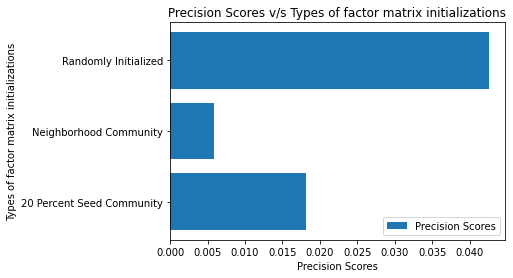

In [ ]:
# The below line creates a horizontal plot
plt.barh(["20 Percent Seed Community","Neighborhood Community","Randomly Initialized"],[precision_20per_seed,precision_neighborhood_seed,precision_simple_seed], align='center', label="Precision Scores")
plt.legend() # Attaches a legend to the plot
plt.ylabel('Types of factor matrix initializations') # Sets the y-label
plt.xlabel('Precision Scores') # Sets the x-label
plt.title('Precision Scores v/s Types of factor matrix initializations') # Sets the title of the plot
plt.show() # Displays the plot

## ***Comparing and Constrating the results obtained for the 3 types of graphs:***

***A) For Graph-I (Recall Score v/s Types of Factor Matrix Initializtions):***

--> Recall Score = (Original Documents ∩ Predicted Communities) / Original Documents

--> On my observations from the graph plotted it is clear that the simple randomly initialized matrix has a higher recall score compared to other matrix initialization methods. This states that the randomly initialized matrix has a higher level correspondance between both the detected communities and the ground truth communities (original data) and are returning positive results.

***B) For Graph-II (Miss Rate v/s Types of Factor Matrix Initializtions):***

--> Miss Rate = 1 - Recall Score

--> On my observations from the graph plotted it is clear that the neighborhood seed community matrix has a higher miss rate compared to other matrix initialization methods. This states that the neighborhood seed communities has a lower level of correspondance between both the detected communities and the ground truth communities (original data).

***C) For Graph-III (Precision Score v/s Types of Factor Matrix Initializtions):***

--> Precision Score = (Original Documents ∩ Predicted Communities) / Predicted Documents

--> On my observation from the graph plotted it is clear that the randomly initialized matrix has a higher precision score comapred to other matrix initialization methods. This states that the radnomly initialized matrix has a higher accuracy between both the detected communities and the ground truth communities (original data) and are returning accurate results.